Handling Missing values/data

In [18]:
import seaborn as sns

In [19]:
df=sns.load_dataset('titanic')

In [20]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [21]:
## check missing values
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

Ways to handle missing values: but can miss alot


In [22]:
## Delete Rows who has missing values
df.dropna()
df.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [23]:
## Delete clms has missing values
df.dropna(axis=1)

,survived,pclass,sex,sibsp,parch,fare,class,who,adult_male,alive,alone
0,0,3,male,1,0,7.2500,Third,man,True,no,False
1,1,1,female,1,0,71.2833,First,woman,False,yes,False
2,1,3,female,0,0,7.9250,Third,woman,False,yes,True
3,1,1,female,1,0,53.1000,First,woman,False,yes,False
4,0,3,male,0,0,8.0500,Third,man,True,no,True
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,0,0,13.0000,Second,man,True,no,True
887,1,1,female,0,0,30.0000,First,woman,False,yes,True
888,0,3,female,1,2,23.4500,Third,woman,False,no,False
889,1,1,male,0,0,30.0000,First,man,True,yes,True


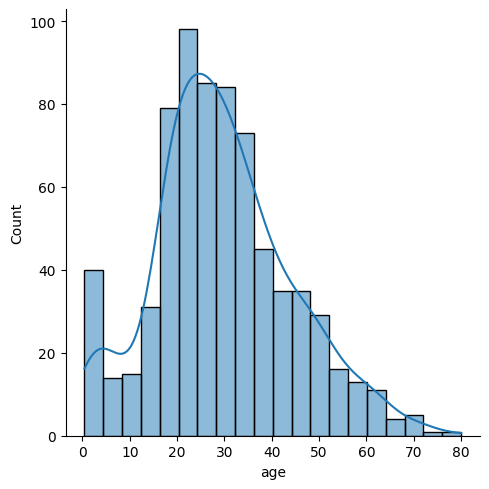

In [24]:
sns.displot(df["age"],kde=True)

## Imputation Techniques to handle missing values

### 1-Mean Value imputation

    -It works well when we have normally distrubuted data
    -If we have different kind of distrubuted like righr skewed or left skewed it wont work

### 2-Median Value imputation

    -It works also if we have different kind of distrubuted
    -It also helps to handle outliers in dataset

### 3.Mode Imputation techinque

    -It is used for categrical clm has null values

1.MEAN VALUE IMPUTATION

In [40]:
## Fill missing values as mean
df["Age_mean"]=df["age"].fillna(df["age"].mean())
df[["Age_mean","age"]]

,Age_mean,age
0,22.000000,22.0
1,38.000000,38.0
2,26.000000,26.0
3,35.000000,35.0
4,35.000000,35.0
...,...,...
886,27.000000,27.0
887,19.000000,19.0
888,29.699118,NaN
889,26.000000,26.0


#### 2.Median Value Imputation: If we have outliers in dataset

In [41]:
df["Age_median"]=df["age"].fillna(df["age"].mean())
df[["Age_median","age"]]

,Age_median,age
0,22.000000,22.0
1,38.000000,38.0
2,26.000000,26.0
3,35.000000,35.0
4,35.000000,35.0
...,...,...
886,27.000000,27.0
887,19.000000,19.0
888,29.699118,NaN
889,26.000000,26.0


#### 3.Mode Imputation techinque : It is used for categrical clm has null values

In [44]:
df[df["embarked"].isnull()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,Age_median,Age_mean
61,1,1,female,38.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True,38.0,38.0
829,1,1,female,62.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True,62.0,62.0


In [ ]:
df["embarked"].unique()df["embarked"].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [49]:
mode_value=df[df["embarked"].notna()]["embarked"].mode()[0]

In [52]:
df["embarked_mode"]=df["embarked"].fillna(mode_value)

In [53]:
df[["embarked_mode","embarked"]]

,embarked_mode,embarked
0,S,S
1,C,C
2,S,S
3,S,S
4,S,S
...,...,...
886,S,S
887,S,S
888,S,S
889,C,C


## 2.Handling Imbalanced Dataset:

- In categorical database there might be chance some data is present a lot and some less so it get imbalalnced

### Techniques:
  #### 1.Upsampling:
      -Incease the datapoint from minorities

  #### 2.DownSampling:
      -Reduce the datapoints from majority

In [55]:
import numpy as np
import pandas as pd

## set the random seed for reproductibility
np.random.seed(123)


##Create dataframe with two classes
n_sample=1000
class_0_ratio=0.9
n_class_0=int(n_sample*class_0_ratio)
n_class_1=n_sample-n_class_0

In [56]:
n_class_0,n_class_1

(900, 100)

#### JUST CREATING IMBALANCED DATASET TO LEARN UPSAMPLING

In [58]:
## CREATE MY DATAFRAME WITH IMBALANCED DATASET
class_0 = pd.DataFrame({
    'feature_1': np.random.normal(loc=0, scale=1, size=n_class_0),
    'feature_2': np.random.normal(loc=0, scale=1, size=n_class_0),
    'target': [0] * n_class_0
})

class_1 = pd.DataFrame({
    'feature_1': np.random.normal(loc=2, scale=1, size=n_class_1),
    'feature_2': np.random.normal(loc=2, scale=1, size=n_class_1),
    'target': [1] * n_class_1
})

In [63]:
df=pd.concat([class_0,class_1]).reset_index(drop=True)

In [65]:
df.head()

,feature_1,feature_2,target
0,-1.774224,0.285744,0
1,-1.201377,0.333279,0
2,1.096257,0.531807,0
3,0.861037,-0.354766,0
4,-1.520367,-1.120815,0


In [66]:
df["target"].value_counts()

target
0    900
1    100
Name: count, dtype: int64

### 1.UPSAMPLING
    -Increaing mirority elements to majority

In [67]:
df_minority=df[df["target"]==1]
df_majority=df[df["target"]==0]

In [70]:
from sklearn.utils import resample
## We are resampling the mirority like increaining alike adding artificail points out there 
df_minority_upsample=resample(df_minority,replace=True,n_samples=len(df_majority),random_state=42)


In [71]:
df_minority_upsample.shape

(900, 3)

In [72]:
df_minority_upsample.head()

,feature_1,feature_2,target
951,2.905343,1.495151,1
992,2.000977,1.814833,1
914,1.927957,2.280911,1
971,2.819483,2.964646,1
960,2.456515,1.833528,1


In [73]:
df_upsampled=pd.concat([df_majority,df_minority_upsample])

In [77]:
df_upsampled["target"].value_counts()

target
0    900
1    900
Name: count, dtype: int64

#### just creating Dataset for learning DownSampling

In [82]:
import numpy as np
import pandas as pd

## set the random seed for reproductibility
np.random.seed(123)


##Create dataframe with two classes
n_sample=1000
class_0_ratio=0.9
n_class_0=int(n_sample*class_0_ratio)
n_class_1=n_sample-n_class_0

## CREATE MY DATAFRAME WITH IMBALANCED DATASET
class_0 = pd.DataFrame({
    'feature_1': np.random.normal(loc=0, scale=1, size=n_class_0),
    'feature_2': np.random.normal(loc=0, scale=1, size=n_class_0),
    'target': [0] * n_class_0
})

class_1 = pd.DataFrame({
    'feature_1': np.random.normal(loc=2, scale=1, size=n_class_1),
    'feature_2': np.random.normal(loc=2, scale=1, size=n_class_1),
    'target': [1] * n_class_1
})

### 2. Downsampling
     -Decreasing the majority elements to Minority

In [81]:
df_minority=df[df["target"]==1]
df_majority=df[df["target"]==0]

In [84]:
from sklearn.utils import resample
## We are resampling the mirority like increaining alike adding artificail points out there 
df_majority_downsample=resample(df_majority,replace=False,n_samples=len(df_minority),random_state=42)

In [85]:
df_majority_downsample

,feature_1,feature_2,target
70,0.786057,0.830076,0
827,-0.859775,0.174732,0
231,-0.012870,-0.735348,0
588,-0.297331,-0.351224,0
39,0.528702,1.508257,0
...,...,...,...
398,1.013666,0.083496,0
76,0.164480,-1.808980,0
196,-1.576624,0.525893,0
631,-0.540147,0.610282,0


In [87]:
df_downsampled=pd.concat([df_minority,df_majority_downsample])

In [88]:
df_downsampled

,feature_1,feature_2,target
900,-0.643425,2.571923,1
901,1.551009,1.782767,1
902,1.641093,2.054318,1
903,2.133194,2.155998,1
904,1.355758,2.467810,1
...,...,...,...
398,1.013666,0.083496,0
76,0.164480,-1.808980,0
196,-1.576624,0.525893,0
631,-0.540147,0.610282,0


In [89]:
df_upsampled["target"].value_counts()

target
0    900
1    900
Name: count, dtype: int64

### SMOTE

In [90]:
from sklearn.datasets import make_classification

In [97]:
x,y=make_classification(n_samples=1000,n_redundant=0,n_features=2,n_clusters_per_class=1,weights=[0.90],random_state=12)

In [99]:
# df1=pd.DataFrame(x,columns=['f1','f2'])
# df2=pd.DataFrame(x,columns=['target'])
# final_df=pd.concat([df1,df2],axis=1)
# final_df.head()

# 2 Handling Outliers

### Box plot 

###### Min,max,median,Q1,Q3,IQR: Concepts to get box plot

In [3]:
import numpy as np

In [ ]:

lst_marks=[45,32,56,75,89,54,32,89,90,87,67,54,45,98,99,67,74]
minimum,q1,median,q3,maximum=np.quantile(lst_marks,[0,0.25,0.50,0.75,1.0])

In [8]:
minimum,q1,median,q3,maximum

(np.float64(32.0),
 np.float64(54.0),
 np.float64(67.0),
 np.float64(89.0),
 np.float64(99.0))

In [9]:
IQR=q3-q1
IQR

np.float64(35.0)

In [11]:
lower_fence=q1-1.5*IQR
higher_fence=q3+1.5*IQR


In [12]:
lower_fence


np.float64(1.5)

In [13]:
higher_fence

np.float64(141.5)

In [14]:
import seaborn as sns

<Axes: >

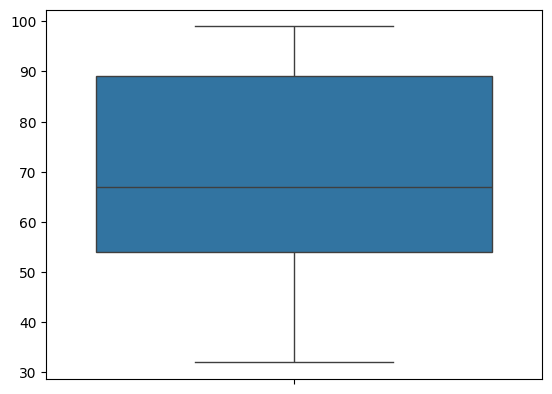

In [ ]:
sns.boxplot(lst_marks)

In [20]:
lst_marks=[-100,-200,45,32,56,75,89,54,32,89,90,87,67,54,45,98,99,67,74,150,170,180]

<Axes: >

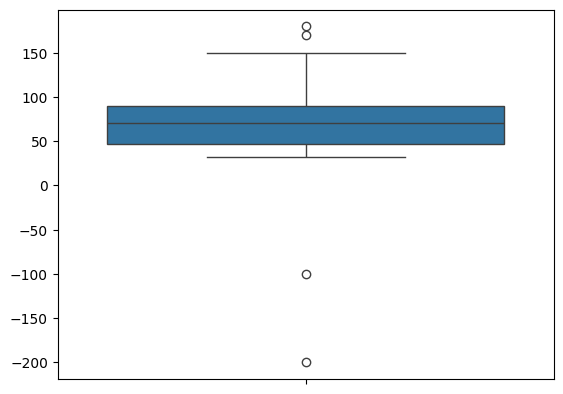

In [21]:
sns.boxplot(lst_marks)

# DATA ENCODING
  ###### -As machine only knows the 0/1 language we have to   convert categorical data into 0/1 format
  #### Types:

  ###### 1.Nominal or ONE HOT ENCODINH
      Convert into binary format 1/0
      It creates the num of clm as many diffent values present there and assign 1 if that clm value there else 0
      Should not use if there are more values present then it will create as many clm there should not use in those cases
      Sparse matrix
  ###### 2.Label and ordinal Encoding:
      Assigns unique lebel to each categories
  ###### 3.Ordinal encoding:
      use to encode data in way of ranking or order 

      
      It will convert them in form like:	
          Hightschool:1
          College:2		
          Graduate:3
          Post-Graduate:4
  ###### 4.Target Guided Ordinal Encoding

In [26]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

In [27]:
### Creating just simple dataframe
df=pd.DataFrame({
  'color':['red','blue','green','red','blue']
  })

In [28]:
df.head()

,color
0,red
1,blue
2,green
3,red
4,blue


In [30]:
## Creaing instance of OneHotEncoding to use
encoder=OneHotEncoder()

In [34]:
## Perform fit and transform 
encoded=encoder.fit_transform(df[["color"]]).toarray()

In [36]:
encoder_df=pd.DataFrame(encoded,columns=encoder.get_feature_names_out())

In [37]:
encoder_df

,color_blue,color_green,color_red
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,0.0,1.0,0.0
3,0.0,0.0,1.0
4,1.0,0.0,0.0


In [39]:
from sklearn.preprocessing import LabelEncoder
lbl=LabelEncoder()

In [40]:
lbl.fit_transform(df[["color"]])

e:\DS_ML_AI_DL_GENAI_practice\venv\lib\site-packages\sklearn\preprocessing\_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([2, 0, 1, 2, 0])

3.ORDINAL ENCODING

In [41]:
df=pd.DataFrame(
  {
    'size':['small','medium','large','medium','small','larger']
  }
)

In [42]:
df

,size
0,small
1,medium
2,large
3,medium
4,small
5,larger


In [43]:
###creating instance for ordinal encoding
from sklearn.preprocessing import OrdinalEncoder
encoder=OrdinalEncoder(categories=[df["size"].unique()])

In [46]:
encoded=encoder.fit_transform(df[["size"]])

e:\DS_ML_AI_DL_GENAI_practice\venv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but OrdinalEncoder was fitted with feature names
  warnings.warn(


array([[0.]])